In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("mnist_train.csv")

In [12]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [15]:
df.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [16]:
x = df.drop(['label'], axis=1)
y = df['label']
x.shape, y.shape

((60000, 784), (60000,))

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((45000, 784), (15000, 784), (45000,), (15000,))

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [20]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred = dtc.predict(x_test)

In [22]:
dtc.score(x_test, y_test)

0.8715333333333334

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[1337,    1,    9,   16,   10,   26,   20,    4,   16,    8],
       [   1, 1596,   15,   12,    6,    4,    5,    9,   13,    5],
       [  11,   21, 1263,   33,   16,   17,   26,   16,   28,   15],
       [  15,   16,   54, 1284,   10,   62,   12,   26,   46,   29],
       [   9,   11,   18,   11, 1274,   15,   31,   19,   32,   63],
       [  30,    8,   11,   54,   21, 1085,   33,   10,   54,   41],
       [  27,    5,   20,    9,   20,   28, 1384,    7,   22,    7],
       [   2,    9,   25,   21,   17,    8,    2, 1388,   12,   54],
       [  21,   22,   39,   48,   23,   52,   32,   15, 1165,   49],
       [  13,   14,   10,   40,   51,   18,    7,   42,   32, 1297]],
      dtype=int64)

<AxesSubplot:>

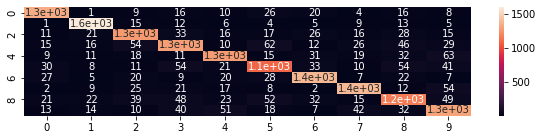

In [27]:
plt.figure(figsize=(10, 2))
sns.heatmap(cm, annot = True)